# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import statsmodels.api as sm

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     776.7
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           2.16e-39
Time:                        15:01:37   Log-Likelihood:                -3.7729
No. Observations:                  50   AIC:                             15.55
Df Residuals:                      46   BIC:                             23.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9682      0.093     53.580      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.44952544  4.96302393  5.43267859  5.8276256   6.12813973  6.32887512
  6.43974365  6.48428638  6.49580587  6.51189462  6.56825878  6.69285168
  6.9012812   7.19424546  7.55741808  7.96380198  8.37816495  8.76282816
  9.08385671  9.31663503  9.44991116  9.48764539  9.44835964  9.36209431
  9.26547274  9.19568415  9.18437348  9.25244226  9.40661454  9.63833215
  9.92516079 10.23447589 10.52882276 10.77207031 10.93534723 11.00178552
 10.96929182 10.85089135 10.67258793 10.46909157 10.27811578 10.13418128
 10.06294442 10.07698182 10.17372417 10.33587827 10.53426832 10.73262937
 10.89356559 10.98469428]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5,25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n-5)**2))
Xnew = sm.add_constant(Xnew)
ynewpred =  olsres.predict(Xnew) # predict out of sample
print(ynewpred)

[10.97001339 10.806745   10.51709796 10.15168341  9.77712346  9.45973971
  9.24931544  9.16690693  9.19968816  9.30409101]


## Plot comparison

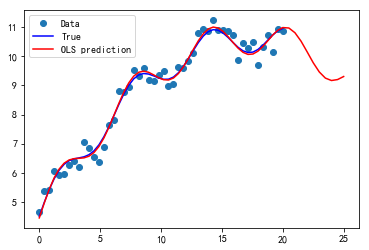

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1" : x1, "y" : y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.968160
x1                  0.508361
np.sin(x1)          0.566318
I((x1 - 5) ** 2)   -0.020745
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.970013
1    10.806745
2    10.517098
3    10.151683
4     9.777123
5     9.459740
6     9.249315
7     9.166907
8     9.199688
9     9.304091
dtype: float64